In [2]:
# 농수축 & 이미용 EDA
import pandas as pd
import numpy as np
import statistics
import matplotlib.pyplot as plt
import seaborn as sns

In [14]:
if 'google.colab' in str(get_ipython()):
    print('Running on CoLab')
    df = pd.read_excel('/content/drive/My Drive/빅데이터_콘테스트/base_line.xlsx', header=0)
else:
    print('Not running on CoLab')
    df = pd.read_excel('c:/bc/base_line.xlsx', header=0)

Not running on CoLab


In [15]:
def group_df(group_name):
    return df[df.p_group == group_name]

def box_plot(group_name):
    times = ['MONTH','DAY_NUM','HOUR']
    features = ['total_price','sales','unit_price']
    nrows = ncols = 3  

    fig, axes = plt.subplots(nrows,ncols, figsize = (18,18))

    for row, time in enumerate(times):
        for col ,feature in enumerate(features):

            g = sns.boxplot(x=time, y=feature, data=group_df(group_name), ax=axes[row,col])

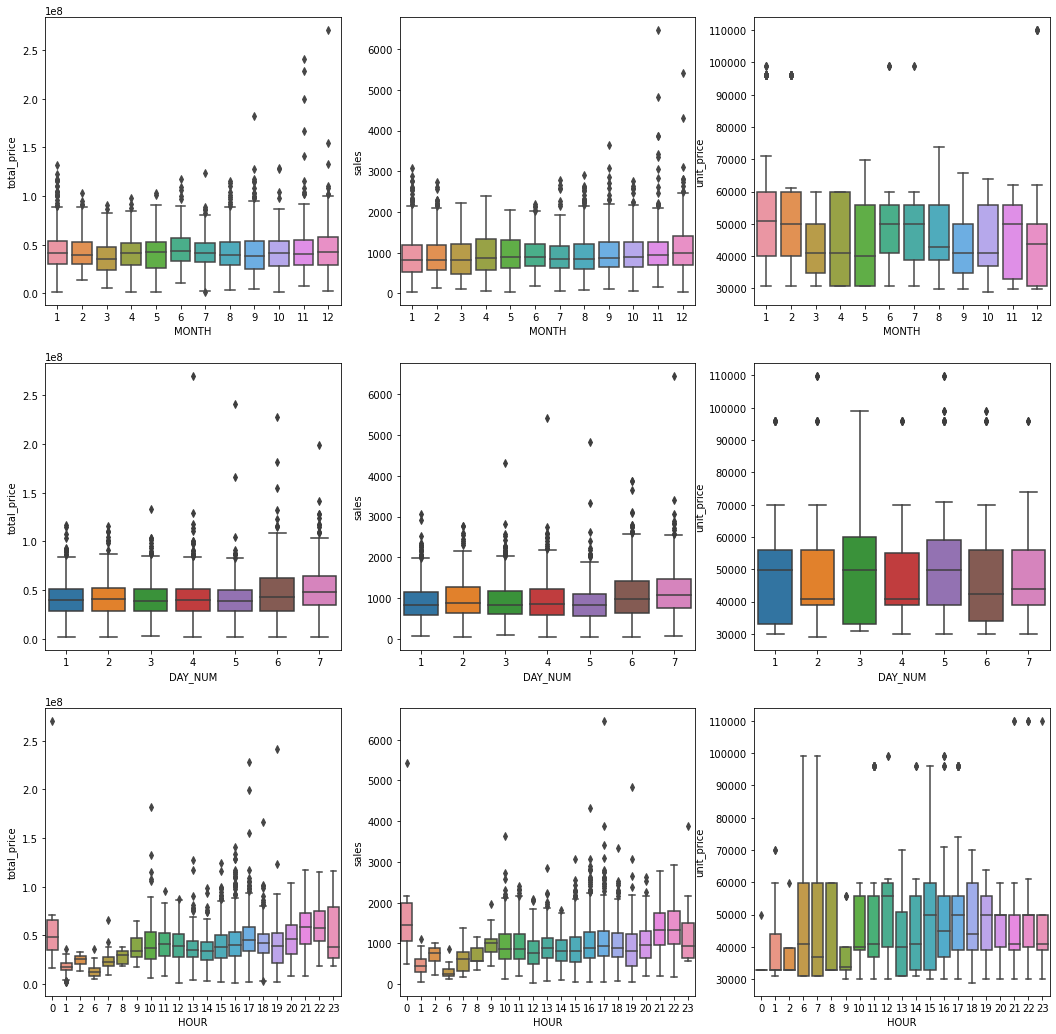

In [16]:
box_plot('농수축')